<a href="https://colab.research.google.com/github/Qu1nnD/CS290/blob/main/StrokePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's practice loading and exploring some data! 😀

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mbrudd/csci290/main/data/stroke.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df["stroke"].unique()

array([1, 0])

In [ ]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
df["stroke"].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [ ]:
df[["stroke","Residence_type"]].value_counts()

stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: count, dtype: int64

In [ ]:
df["stroke"].mean()

0.0487279843444227

<Axes: xlabel='age', ylabel='stroke'>

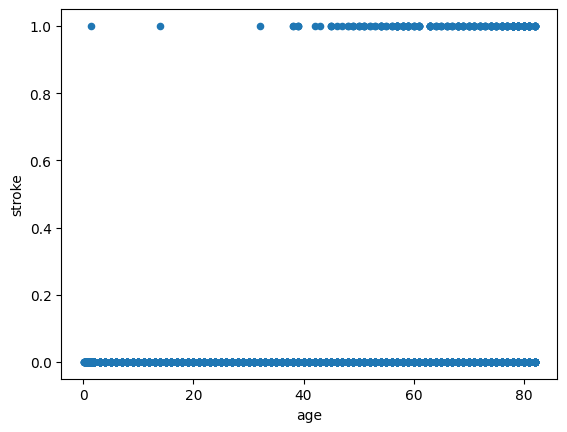

In [ ]:
df.plot(x="age",y="stroke",kind="scatter")

In [ ]:
df["age_cat"]=pd.cut(df["age"],bins=[0,25,45,61,100],labels=["Young","Adult","Middle-aged","Old"])

In [ ]:
df["age_cat"].value_counts()

,count
age_cat,
Adult,1325
Young,1293
Middle-aged,1264
Old,1228


In [ ]:
df.groupby("age_cat", observed=True)["stroke"].mean()

,stroke
age_cat,
Young,0.001547
Adult,0.008302
Middle-aged,0.051424
Old,0.139251


In [ ]:
df.groupby("hypertension")["stroke"].mean()

,stroke
hypertension,
0,0.039679
1,0.132530


In [ ]:
df.groupby("heart_disease")["stroke"].mean()

,stroke
heart_disease,
0,0.041787
1,0.170290


In [ ]:
df.groupby(["heart_disease","hypertension","ever_married"])["stroke"].mean()

heart_disease  hypertension  ever_married
0              0             No              0.008923
                             Yes             0.049283
               1             No              0.159091
                             Yes             0.117949
1              0             No              0.130435
                             Yes             0.164021
               1             No              0.444444
                             Yes             0.163636
Name: stroke, dtype: float64

In [8]:
df["prediction"]=df["age"]>61

In [9]:
df["prediction"].value_counts()

,count
prediction,
False,3882
True,1228


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
confusion_matrix(df["stroke"],df["prediction"])

array([[3804, 1057],
       [  78,  171]])

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
cm=confusion_matrix(df["stroke"],df["prediction"])
cm

array([[3804, 1057],
       [  78,  171]])

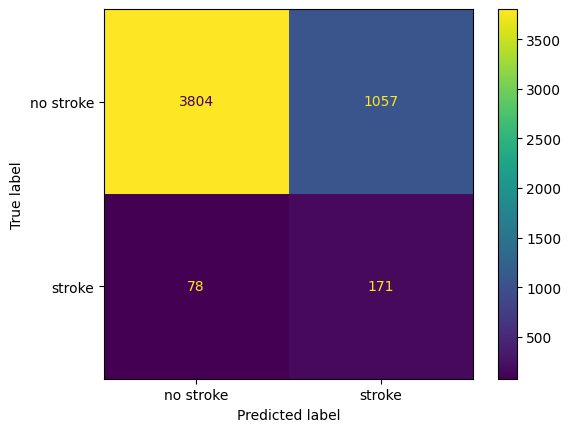

In [17]:
ConfusionMatrixDisplay(cm,display_labels=["no stroke","stroke"]).plot()

In [18]:
tn, fp, fn, tp = confusion_matrix(df["stroke"],df["predition"]).ravel()
tn, fp, fn, tp

(3804, 1057, 78, 171)

In [19]:
import sklearn.metrics as metrics

In [20]:
metrics.recall_score(df["stroke"],df["prediction"])

0.6867469879518072

In [21]:
tp/(tp+fn)

0.6867469879518072

In [22]:
metrics.precision_score(df["stroke"],df["prediction"])

0.13925081433224756

In [23]:
tp/(tp+fp)

0.13925081433224756

In [30]:
def precision_vs_recall(threshold):
  df["prediction"]=df["age"]>threshold
  return metrics.precision_score(df["stroke"], df["prediction"]), metrics.recall_score(df["stroke"],df["prediction"])

In [31]:
precision_vs_recall(61)

(0.13925081433224756, 0.6867469879518072)

In [41]:
precisions=[]
recalls=[]
thresholds=range(0,83)
for threshold in thresholds:
  precision, recall = precision_vs_recall(threshold)
  precisions.append(precision)
  recalls.append(recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
pr=pd.DataFrame({
    "threshold":thresholds,
    "precision":precisions,
    "recall":recalls
})

In [45]:
pr.tail()

,threshold,precision,recall
78,78,0.210332,0.228916
79,79,0.215054,0.160643
80,80,0.198276,0.092369
81,81,0.160714,0.036145
82,82,0.000000,0.000000


<Axes: xlabel='threshold'>

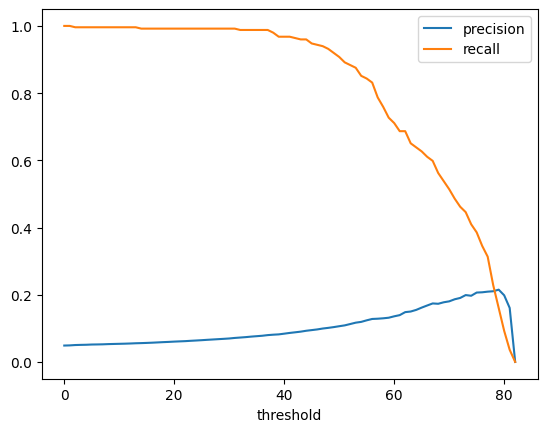

In [46]:
pr.plot(x="threshold", y=["precision", "recall"])